# LAB 3: NCI60

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from seaborn import scatterplot
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

%matplotlib inline

Let's import and explore the data:

In [42]:
# Load data and labels
nci_data_df = pd.read_csv('../data/nci_data.csv') 
nci_labels_df = pd.read_csv('../data/nci_labs.csv', index_col=0)

# Print data and labels
print(nci_data_df.head())
print(nci_labels_df.head())

  Unnamed: 0         1         2         3         4         5             6  \
0         V1  0.300000  1.180000  0.550000  1.140000 -0.265000 -7.000000e-02   
1         V2  0.679961  1.289961  0.169961  0.379961  0.464961  5.799610e-01   
2         V3  0.940000 -0.040000 -0.170000 -0.040000 -0.605000  0.000000e+00   
3         V4  0.280000 -0.310000  0.680000 -0.810000  0.625000 -1.387779e-17   
4         V5  0.485000 -0.465000  0.395000  0.905000  0.200000 -5.000000e-03   

          7         8         9  ...      6821      6822      6823      6824  \
0  0.350000 -0.315000 -0.450000  ... -0.990019  0.000000  0.030000 -0.175000   
1  0.699961  0.724961 -0.040039  ... -0.270058 -0.300039 -0.250039 -0.535039   
2  0.090000  0.645000  0.430000  ...  0.319981  0.120000 -0.740000 -0.595000   
3  0.170000  0.245000  0.020000  ... -1.240020 -0.110000 -0.160000  0.095000   
4  0.085000  0.110000  0.235000  ...  0.554980 -0.775000 -0.515000 -0.320000   

       6825      6826      6827      6

Let's create arrays of the data, gene names, cell names and cancer labels:

In [43]:
# Convert data, to numpy arrays
cancer_labels = nci_labels_df.values.flat
print(np.shape(cancer_labels))
genes = nci_data_df.columns.values[1:]
print(np.shape(genes))
cells = nci_data_df.iloc[:,0].to_numpy()
print(np.shape(cells))
nci_data = nci_data_df.loc[:,genes].values
print(np.shape(nci_data))

(64,)
(6830,)
(64,)
(64, 6830)


## Applying PCA

Let's scale the data to have mean 0 and std 1:

In [44]:
# Standarize data
scaler = StandardScaler()
nci_scaled = scaler.fit_transform(nci_data)

Let's compute PCA:

In [45]:
# Compute PCA
pca = PCA()
pca_data = pca.fit_transform(nci_scaled)

Let's define the loadings and score vectors:

In [46]:
# Define component loadings
pca_loadings = (pca.components_).T
pca_loadings_df = pd.DataFrame(pca_loadings, index=genes)

In [ ]:
# Define score vectors
pca_score_vectors = pca_data
pca_score_vectors_df = pd.DataFrame(pca_score_vectors, index=cells)

Let's plot the score vectors of the first three components:

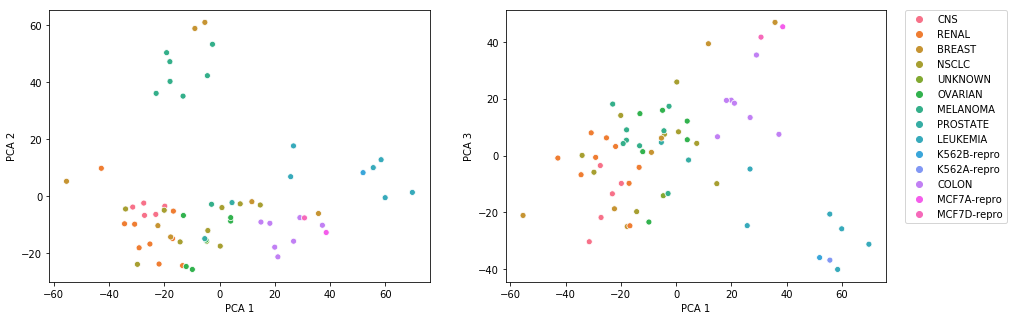

In [69]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15, 5))

scatterplot(pca_score_vectors_df.iloc[:, 0], pca_score_vectors_df.iloc[:, 1], 
            hue=cancer_labels,
            legend=False,
            ax=ax1);
ax1.set_xlabel('PCA 1');
ax1.set_ylabel('PCA 2');

scatterplot(pca_score_vectors_df.iloc[:, 0], pca_score_vectors_df.iloc[:, 2], 
            hue=cancer_labels,
            ax=ax2);
ax2.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);
ax2.set_xlabel('PCA 1');
ax2.set_ylabel('PCA 3');

Let's examine the PVE of the first five components:

In [74]:
# Define the variance
variance = pca.explained_variance_
variance_ratio = pca.explained_variance_ratio_

# Print the variance
columns_pca = ['PCA_' + str(pca +1) for pca in range(0, np.shape(pca_score_vectors)[1])]
variance_df = pd.DataFrame([variance, variance_ratio], 
                           index = ['Variance', 'Variance_ratio'],
                           columns=columns_pca)
print(variance_df.iloc[:,:5])

                     PCA_1       PCA_2       PCA_3       PCA_4       PCA_5
Variance        788.130264  468.773214  399.086552  294.712859  259.147796
Variance_ratio    0.113589    0.067562    0.057518    0.042476    0.037350


Let's plot the PVE of the components:

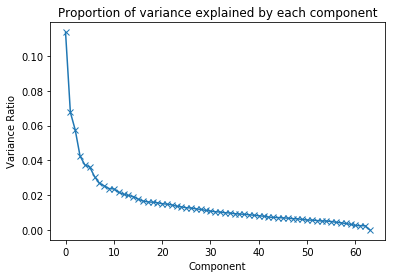

In [77]:
# Plot variance explained by each component 
plt.plot(variance_ratio, marker='x')
plt.title('Proportion of variance explained by each component')
plt.ylabel('Variance Ratio');
plt.xlabel('Component');

Let's plot the cumulative PVE's:

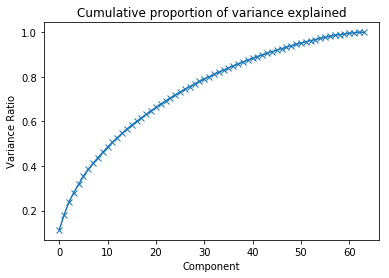

In [79]:
# Plot cumulative sum of variance explained by each component
cumulative_values = np.cumsum(variance_ratio)
plt.plot(cumulative_values, marker = 'x')
plt.title('Cumulative proportion of variance explained')
plt.ylabel('Variance Ratio');
plt.xlabel('Component');

## Clustering the data

Let's perform hierarchical clustering of the observations using complete, single, and average linkage:

In [97]:
from scipy.cluster.hierarchy  import cut_tree, dendrogram, linkage

In [83]:
# Perform hc
hc_complete = linkage(nci_scaled, method='complete')
hc_single = linkage(nci_scaled, method='single')
hc_average = linkage(nci_scaled, method='average')

Let's plot the dendrograms:

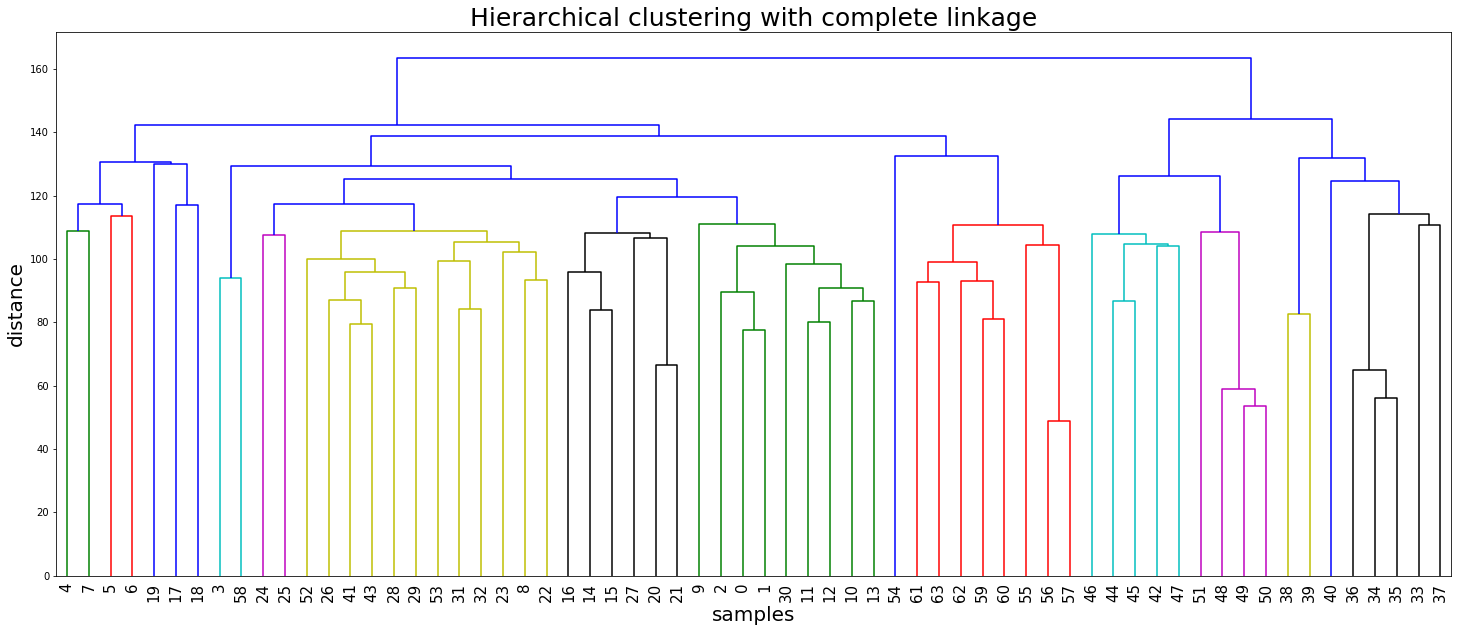

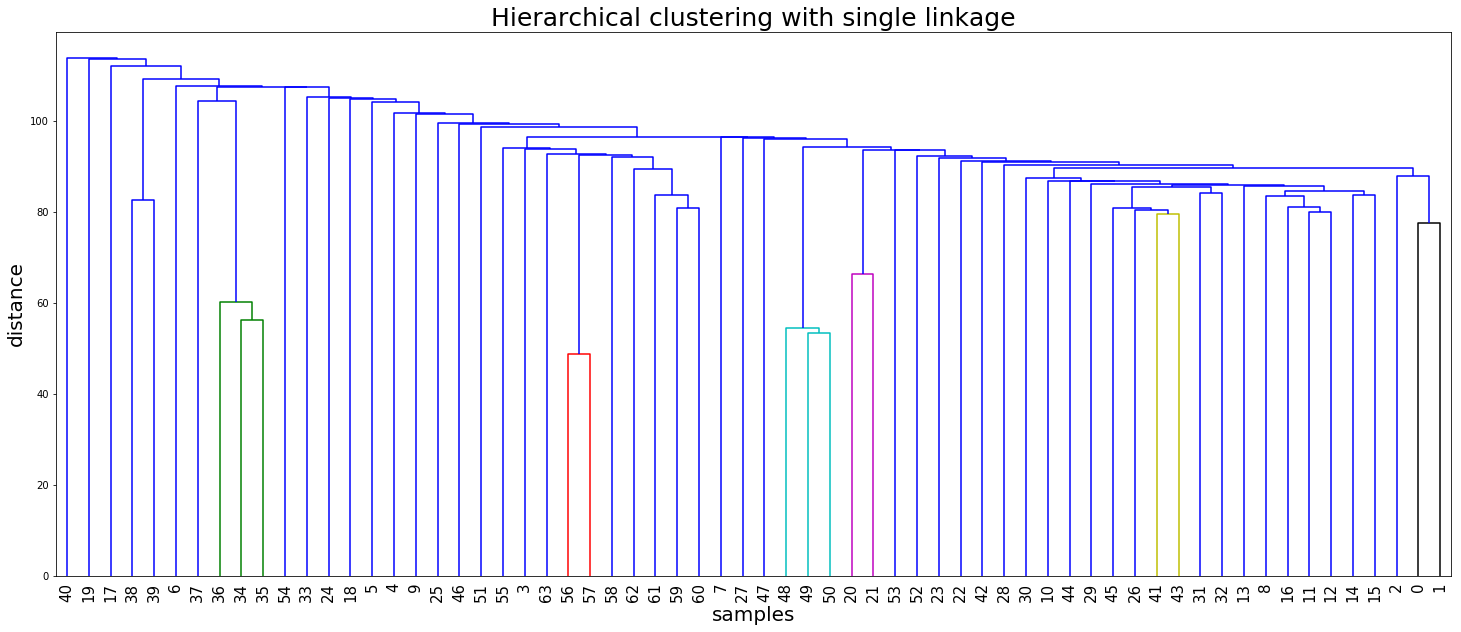

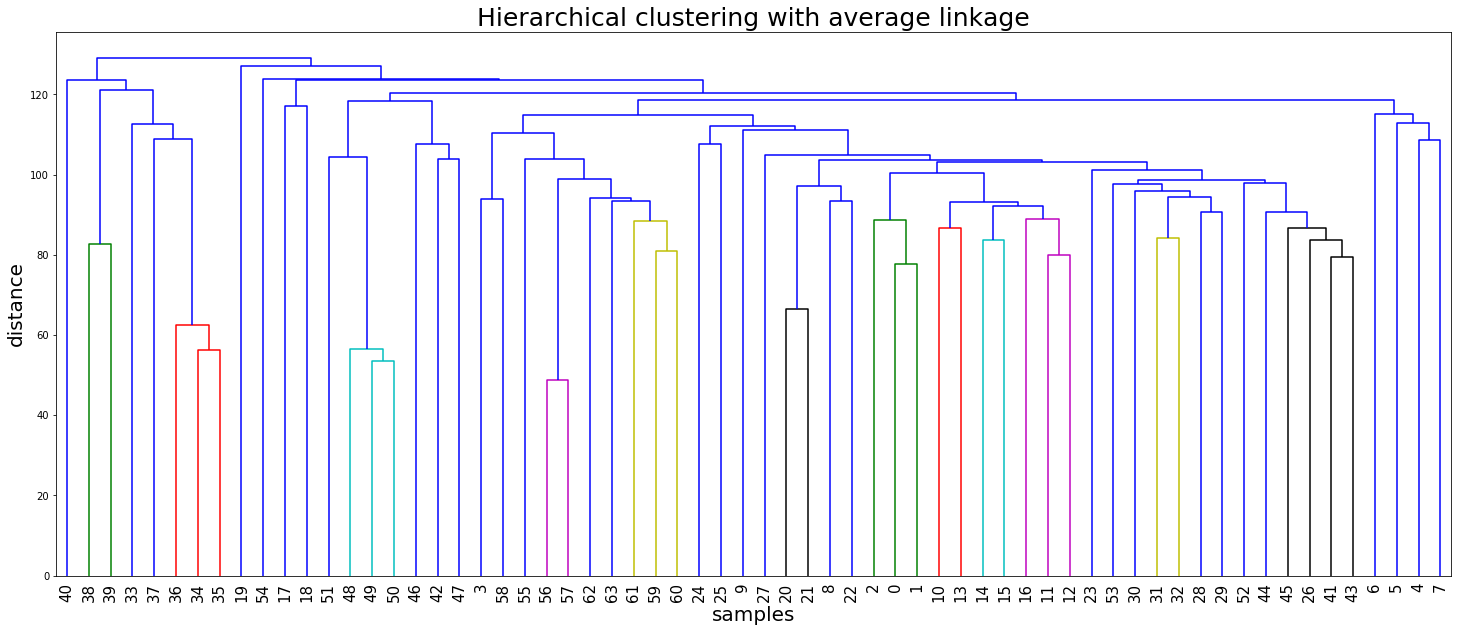

In [96]:
# Plot hc_complete dendrogram
plt.figure(figsize=(25, 10))
plt.title('Hierarchical clustering with complete linkage', size=25)
plt.xlabel('samples', size=20)
plt.ylabel('distance', size=20)
dendrogram(hc_complete, 
           leaf_rotation=90, 
           leaf_font_size=15)
plt.show()

# Plot hc_single dendrogram
plt.figure(figsize=(25, 10))
plt.title('Hierarchical clustering with single linkage', size=25)
plt.xlabel('samples', size=20)
plt.ylabel('distance', size=20)
dendrogram(hc_single, 
           leaf_rotation=90, 
           leaf_font_size=15)
plt.show()

# Plot hc_average dendrogram
plt.figure(figsize=(25, 10))
plt.title('Hierarchical clustering with average linkage', size=25)
plt.xlabel('samples', size=20)
plt.ylabel('distance', size=20)
dendrogram(hc_average, 
           leaf_rotation=90, 
           leaf_font_size=15)
plt.show()

Let's use the complete linkage results and cut the dendrogram where 4 clusters are found:

In [123]:
cutree = cut_tree(hc_complete, n_clusters=4).flat

hc_df = pd.DataFrame({'labels': cancer_labels, 'hc_results': cutree, })
print(hc_df)

         labels  hc_results
0           CNS           0
1           CNS           0
2           CNS           0
3         RENAL           0
4        BREAST           1
5           CNS           1
6           CNS           1
7        BREAST           1
8         NSCLC           0
9         NSCLC           0
10        RENAL           0
11        RENAL           0
12        RENAL           0
13        RENAL           0
14        RENAL           0
15        RENAL           0
16        RENAL           0
17       BREAST           1
18        NSCLC           1
19        RENAL           1
20      UNKNOWN           0
21      OVARIAN           0
22     MELANOMA           0
23     PROSTATE           0
24      OVARIAN           0
25      OVARIAN           0
26      OVARIAN           0
27      OVARIAN           0
28      OVARIAN           0
29     PROSTATE           0
..          ...         ...
34  K562B-repro           2
35  K562A-repro           2
36     LEUKEMIA           2
37     LEUKEMIA     

/Users/martina.gonzales/anaconda3/envs/ml/lib/python3.6/site-packages/pandas/core/dtypes/dtypes.py:458: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if string == 'category':


Let's compare these results with those obtained with k-means with k = 4:

In [124]:
from sklearn.cluster import KMeans

In [125]:
# Compute k-means
kmeans = KMeans(n_clusters=4, n_init=20)  # n_init is the number of initial configurations
kmeans.fit(nci_scaled)
kmeans_labels = kmeans.labels_

hc_df['k-means_results'] = pd.Series(kmeans_labels)
print(hc_df)

         labels  hc_results  k-means_results
0           CNS           0                2
1           CNS           0                2
2           CNS           0                2
3         RENAL           0                2
4        BREAST           1                2
5           CNS           1                2
6           CNS           1                2
7        BREAST           1                2
8         NSCLC           0                2
9         NSCLC           0                2
10        RENAL           0                2
11        RENAL           0                2
12        RENAL           0                2
13        RENAL           0                2
14        RENAL           0                2
15        RENAL           0                2
16        RENAL           0                2
17       BREAST           1                2
18        NSCLC           1                2
19        RENAL           1                2
20      UNKNOWN           0                2
21      OV

Let's compare these results with computing hierarchical clustering with the first pca components:

In [128]:
hc_pca = linkage(pca_score_vectors[:,:5], method='complete')
cutree_pca = cut_tree(hc_pca, n_clusters=4).flat

hc_df['hc_pca_results'] = pd.Series(cutree_pca)
print(hc_df)

         labels  hc_results  k-means_results  hc_pca_results
0           CNS           0                2               0
1           CNS           0                2               1
2           CNS           0                2               0
3         RENAL           0                2               1
4        BREAST           1                2               1
5           CNS           1                2               1
6           CNS           1                2               1
7        BREAST           1                2               1
8         NSCLC           0                2               1
9         NSCLC           0                2               0
10        RENAL           0                2               0
11        RENAL           0                2               0
12        RENAL           0                2               0
13        RENAL           0                2               0
14        RENAL           0                2               0
15        RENAL         